In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
df = pd.read_csv("Admission_Predict.csv")
df.head(10)

,Serial_num,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


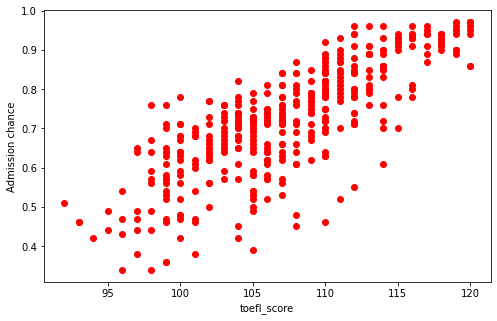

In [3]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["TOEFL_Score"].values, df["Chance_of_Admit"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Admission chance')
plt.xlabel('toefl_score')
plt.show()

In [4]:
def sigmoid(x, Beta_1, Beta_2):                    # apply logistic function
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [5]:
# normalize x and y for finding best parameters
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [6]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 12.241374, beta_2 = 0.800447


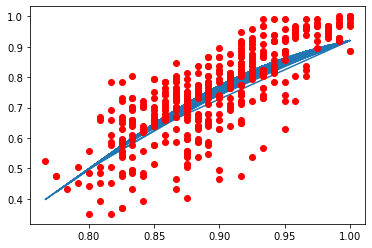

In [11]:
Y_pred = sigmoid(xdata, beta_1 , beta_2)

#plot prediction against datapoints
plt.plot(xdata, Y_pred)
plt.plot(xdata, ydata, 'ro')

In [12]:
msk = np.random.rand(len(df)) < 0.7
trainx = xdata[msk]
testx = xdata[~msk]
trainy = ydata[msk]
testy = ydata[~msk]

In [13]:
popt, pcov = curve_fit(sigmoid, trainx, trainy)

In [14]:
y_testout = sigmoid(testx, *popt)

In [15]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_testout - testy)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_testout - testy) ** 2))

Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
